# Analisis Data Canada.xlsx
*IPSd Minggu 5 - Posttest 3*

In [11]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Load data dari file Excel
df = pd.read_excel('Canada.xlsx', sheet_name=None)
list(df.keys())

['Canada by Citizenship']

In [13]:
# Misal sheet utama bernama 'Canada by Citizenship'
df_canada = df['Canada by Citizenship']
df_canada.head()

,OdName,AreaName,RegName,DevName,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,NaN,NaN,NaN,NaN,NaN,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,NaN,NaN,NaN,NaN,NaN,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,NaN,NaN,NaN,NaN,NaN,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,NaN,NaN,NaN,NaN,NaN,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,NaN,NaN,NaN,NaN,NaN,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
# Bersihkan dan olah data
df_canada = df_canada.dropna(how='all')
df_canada = df_canada.drop(['AreaName', 'RegName', 'DevName', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1)
df_canada = df_canada.rename(columns={'OdName': 'Country'})
df_canada.set_index('Country', inplace=True)
df_canada.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
# Contoh Analisis: Imigrasi terbanyak ke Canada (top 5 negara)
df_canada['Total'] = df_canada.loc[:, 1980:2013].sum(axis=1)
top5 = df_canada['Total'].sort_values(ascending=False).head()
top5

Country
Total                                                   6924212
India                                                    691904
China                                                    659962
United Kingdom of Great Britain and Northern Ireland     551500
Unknown                                                  515059
Name: Total, dtype: int64

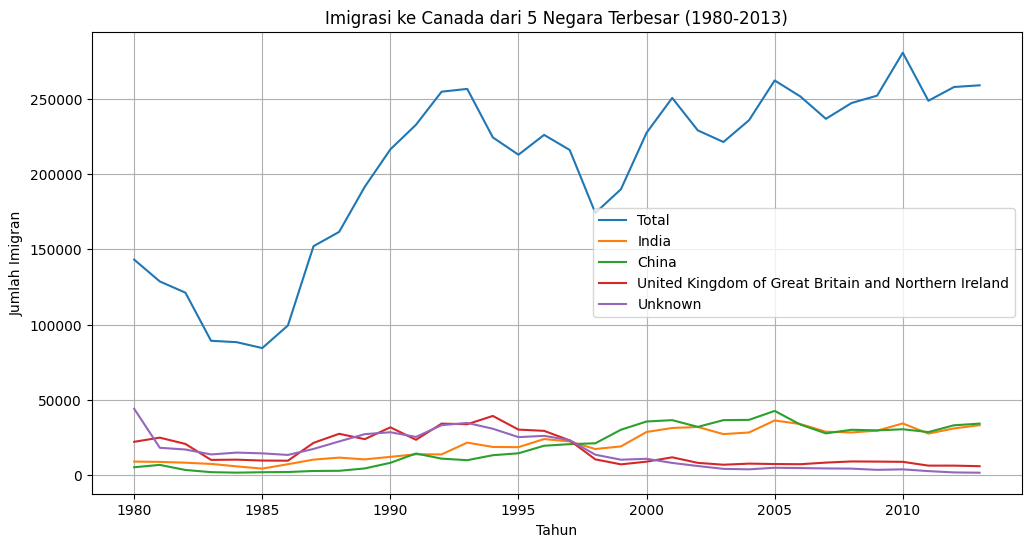

In [16]:
# Visualisasi: Imigran per tahun dari 5 negara terbesar
years = list(range(1980, 2014))
df_top5 = df_canada.loc[top5.index, years].transpose()
df_top5.plot(kind='line', figsize=(12,6))
plt.title('Imigrasi ke Canada dari 5 Negara Terbesar (1980-2013)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.grid(True)
plt.legend(top5.index)
plt.show()